In [1]:
%matplotlib osx
import mne

In [2]:
#Here I set the path to where I downloaded my .fif file
data_path = '/Users/samutienhaara/Downloads/Filt_Zubarev-0.fif'

In [3]:
raw = mne.io.read_raw_fif(data_path)
print(raw)

Opening raw data file /Users/samutienhaara/Downloads/Filt_Zubarev-0.fif...
This filename (/Users/samutienhaara/Downloads/Filt_Zubarev-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


<ipython-input-3-53f1dcc99f51>:1: RuntimeWarning: This filename (/Users/samutienhaara/Downloads/Filt_Zubarev-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw = mne.io.read_raw_fif(data_path)


    Range : 38000 ... 1315999 =     38.000 ...  1315.999 secs
Ready.
Split raw file detected but next file /Users/samutienhaara/Downloads/Filt_Zubarev-1.fif does not exist.
Current compensation grade : 0
<Raw  |  Filt_Zubarev-0.fif, n_channels x n_times : 400 x 1278000 (1278.0 sec), ~6.8 MB, data not loaded>


<ipython-input-3-53f1dcc99f51>:1: RuntimeWarning: Split raw file detected but next file /Users/samutienhaara/Downloads/Filt_Zubarev-1.fif does not exist.
  raw = mne.io.read_raw_fif(data_path)


In [4]:
raw.crop(tmin=700, tmax=None)
raw.load_data()
raw.pick_types(meg='grad', eeg=False, stim=True)

Reading 0 ... 577999  =      0.000 ...   577.999 secs...


<Raw  |  Filt_Zubarev-0.fif, n_channels x n_times : 214 x 578000 (578.0 sec), ~950.2 MB, data loaded>

In [5]:
raw.info['sfreq']

1000.0

In [6]:
events = mne.find_events(raw, 'STI102', min_duration=0.01)
events

384 events found
Event IDs: [ 1 11 12 22 33]


array([[ 738291,       0,       1],
       [ 738875,       0,      33],
       [ 741409,       0,       1],
       ...,
       [1312309,       0,      22],
       [1314526,       0,       1],
       [1315126,       0,      22]])

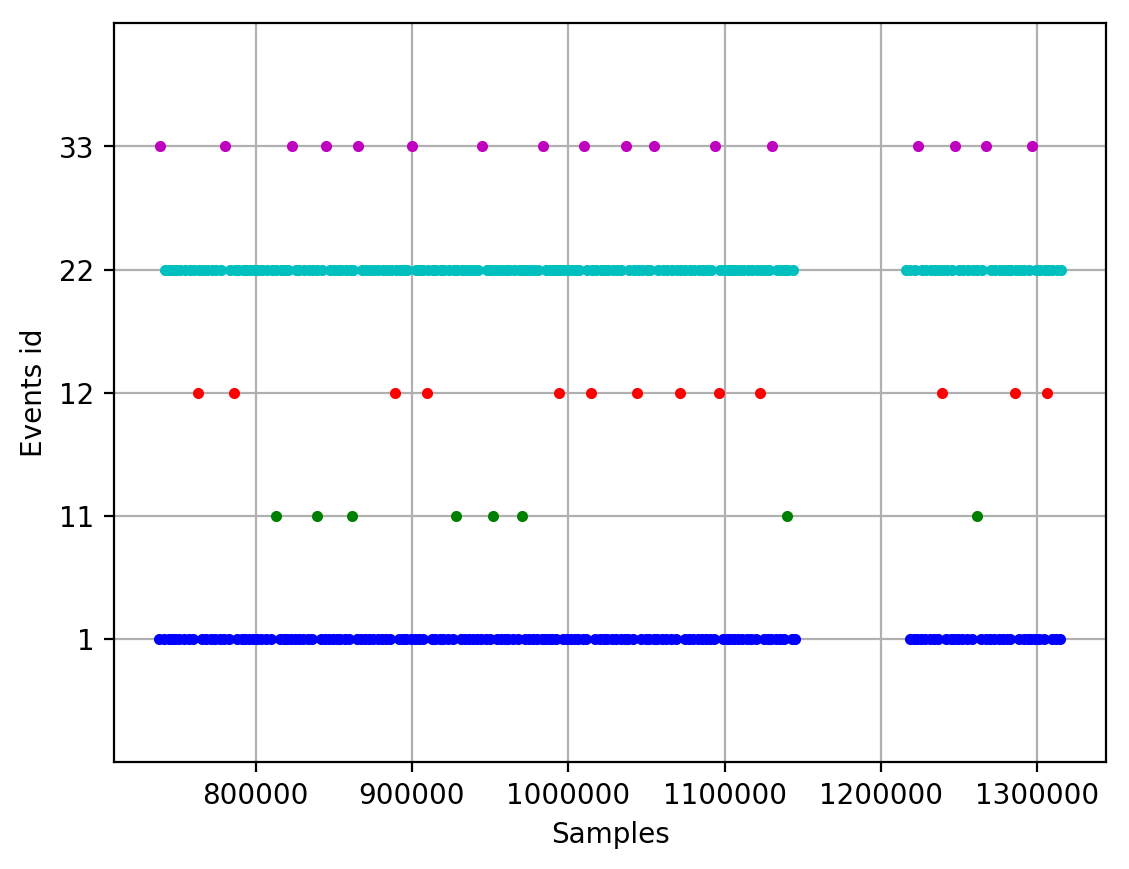

In [7]:
mne.viz.plot_events(events)

In [8]:
import numpy as np
np.unique(events[:, 2])

array([ 1, 11, 12, 22, 33])

In [9]:
raw.filter(0.5, 15)

Setting up band-pass filter from 0.5 - 15 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 3.8 Hz
Filter length of 6601 samples (6.601 sec) selected


<Raw  |  Filt_Zubarev-0.fif, n_channels x n_times : 214 x 578000 (578.0 sec), ~950.2 MB, data loaded>

In [10]:
event_id = dict(standard=1, deviant_left=11, deviant_right=12)
epochs = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=1.0, baseline=(-0.2, 0), preload=True)
print(epochs)

192 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 192 events and 1201 original time points ...
0 bad epochs dropped
<Epochs  |   192 events (all good), -0.2 - 1 sec, baseline [-0.2, 0], ~383.0 MB, data loaded,
 'deviant_left': 8
 'deviant_right': 13
 'standard': 171>


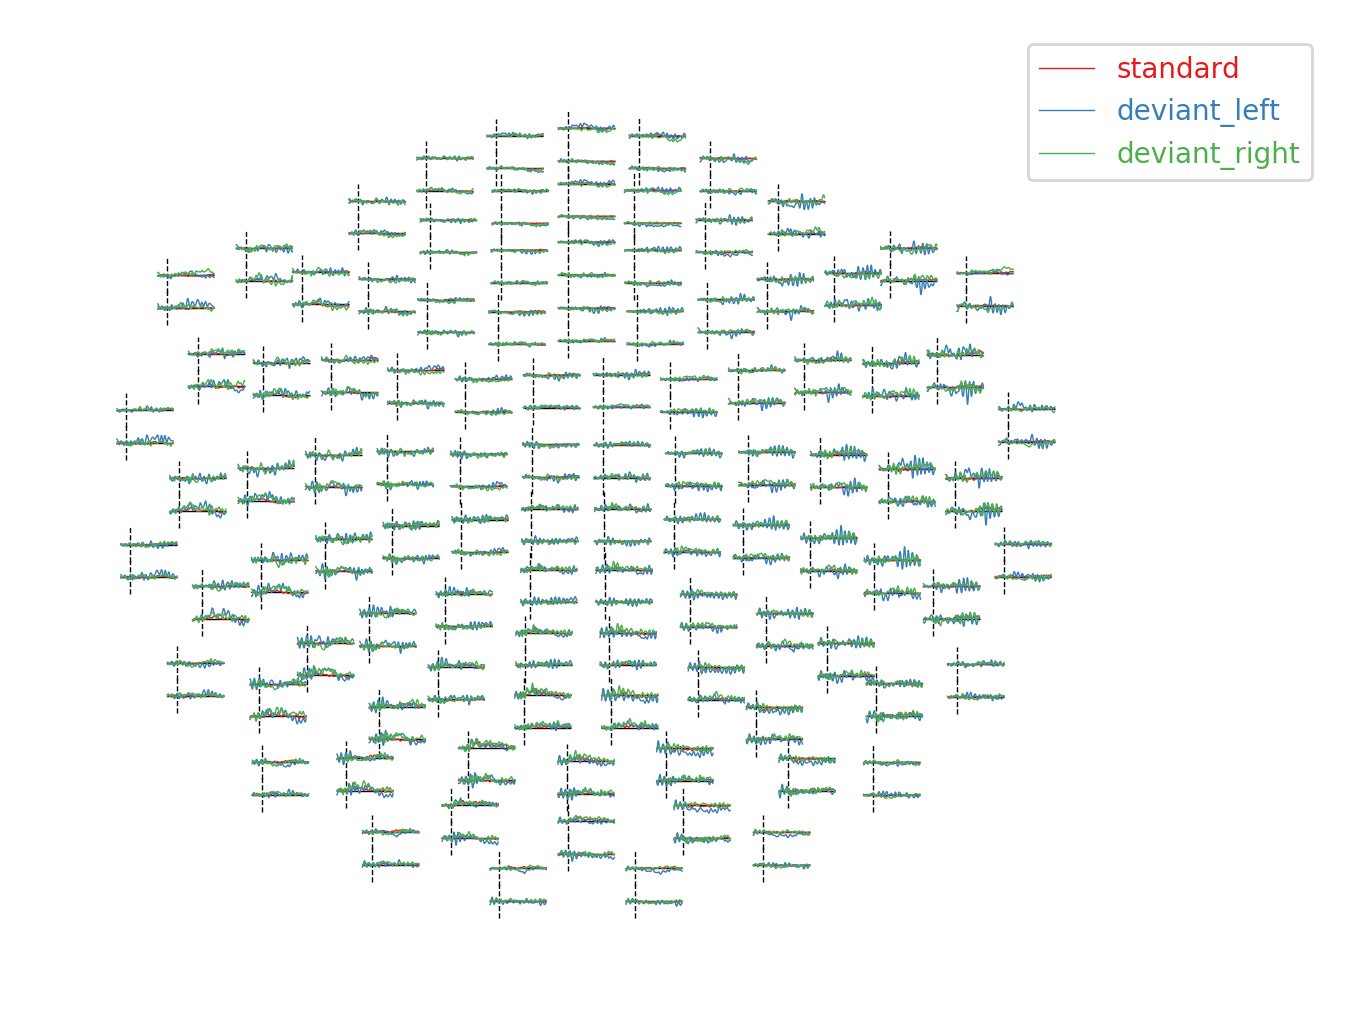

In [12]:
mne.viz.plot_evoked_topo([epochs[cl].average() for cl in ['standard', 'deviant_left', 'deviant_right']])

In [13]:
evoked = [epochs[cl].average() for cl in ['standard', 'deviant_left', 'deviant_right']]

In [14]:
tfr = mne.time_frequency.tfr_morlet(epochs, [8, 9, 10, 11, 12], n_cycles=2, use_fft=True, return_itc=False)
tfr_right = mne.time_frequency.tfr_morlet(epochs['deviant_right'], [8, 9, 10, 11, 12], n_cycles=2, use_fft=True, return_itc=False)
tfr_left = mne.time_frequency.tfr_morlet(epochs['deviant_left'], [8, 9, 10, 11, 12], n_cycles=2, use_fft=True, return_itc=False)
tfr_standard = mne.time_frequency.tfr_morlet(epochs['standard'], [8, 9, 10, 11, 12], n_cycles=2, use_fft=True, return_itc=False)

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


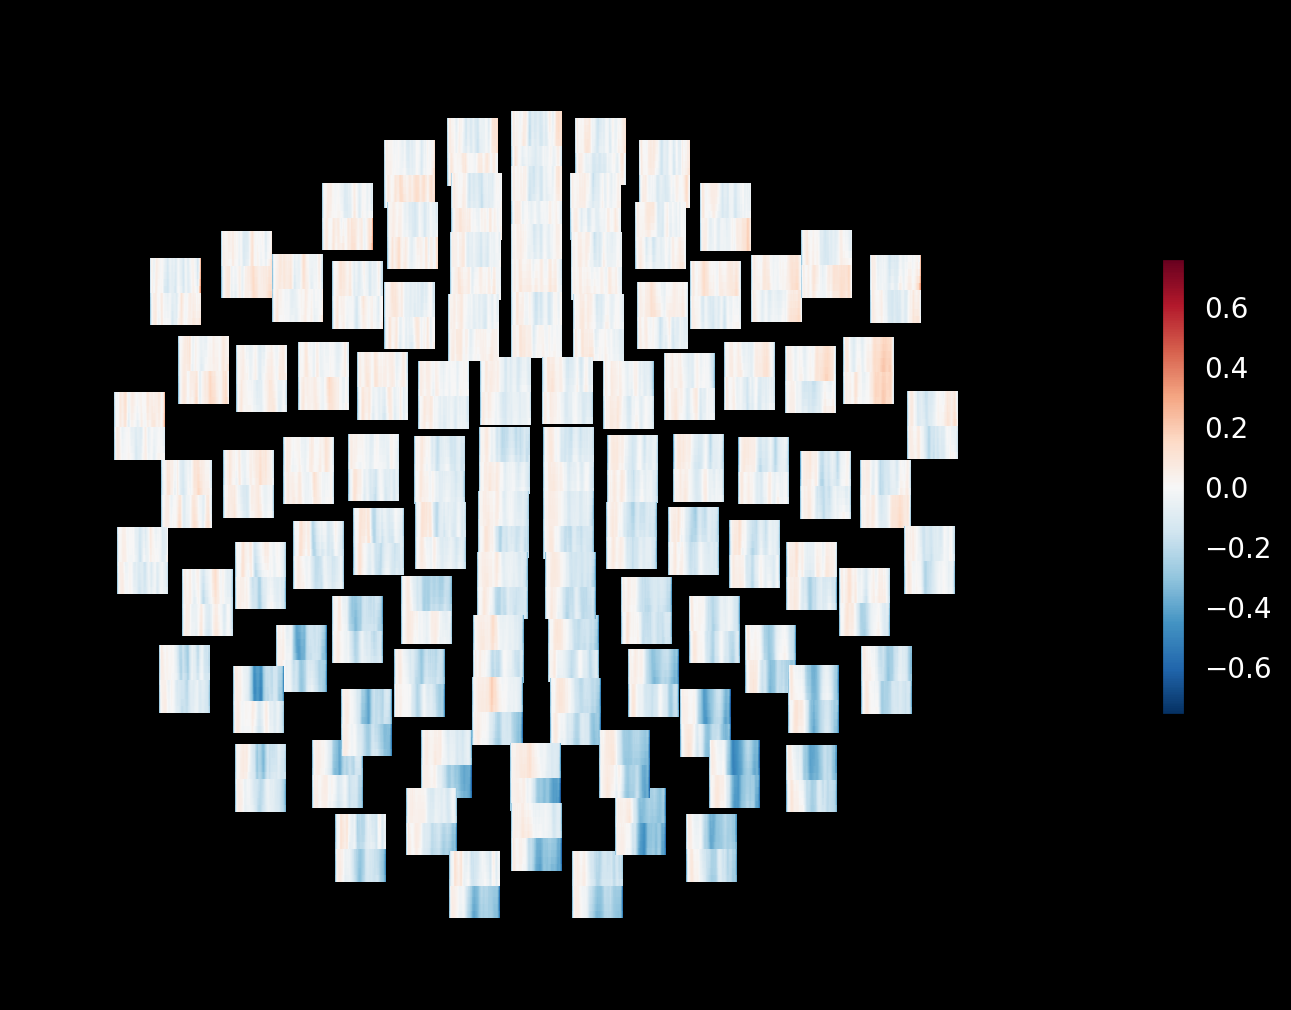

In [16]:
tfr.plot_topo(mode='logratio', baseline=(-0.2, 0))
tfr_right.plot_topo(mode='logratio', baseline=(-0.2, 0))
tfr_left.plot_topo(mode='logratio', baseline=(-0.2, 0))
tfr_standard.plot_topo(mode='logratio', baseline=(-0.2, 0))

Applying baseline correction (mode: mean)
No baseline correction applied
No baseline correction applied


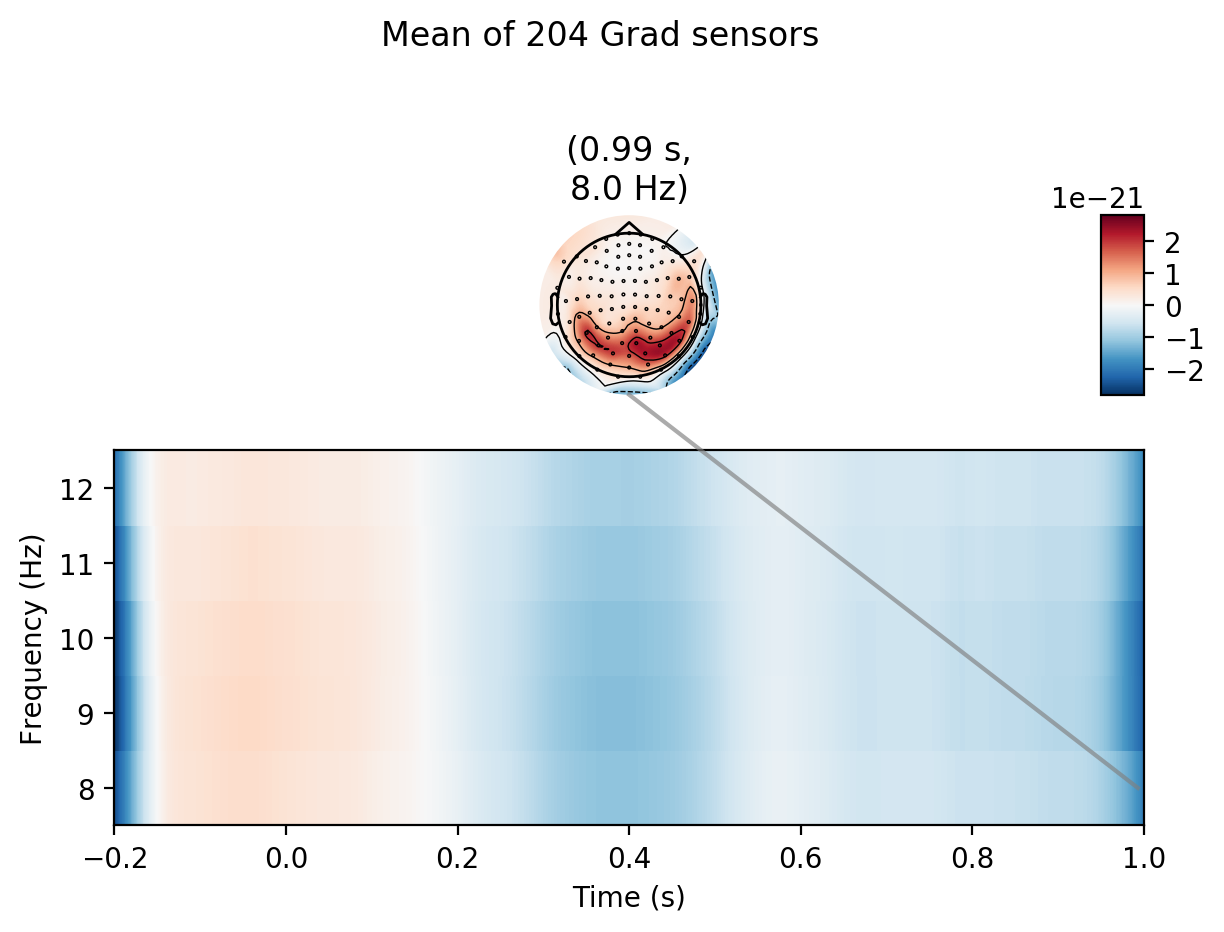

In [17]:
tfr.apply_baseline((-0.2, 0))
tfr.plot_joint(mode = 'logratio')

In [18]:
import surfer
from mayavi import mlab

    using multitaper spectrum estimation with 7 DPSS windows


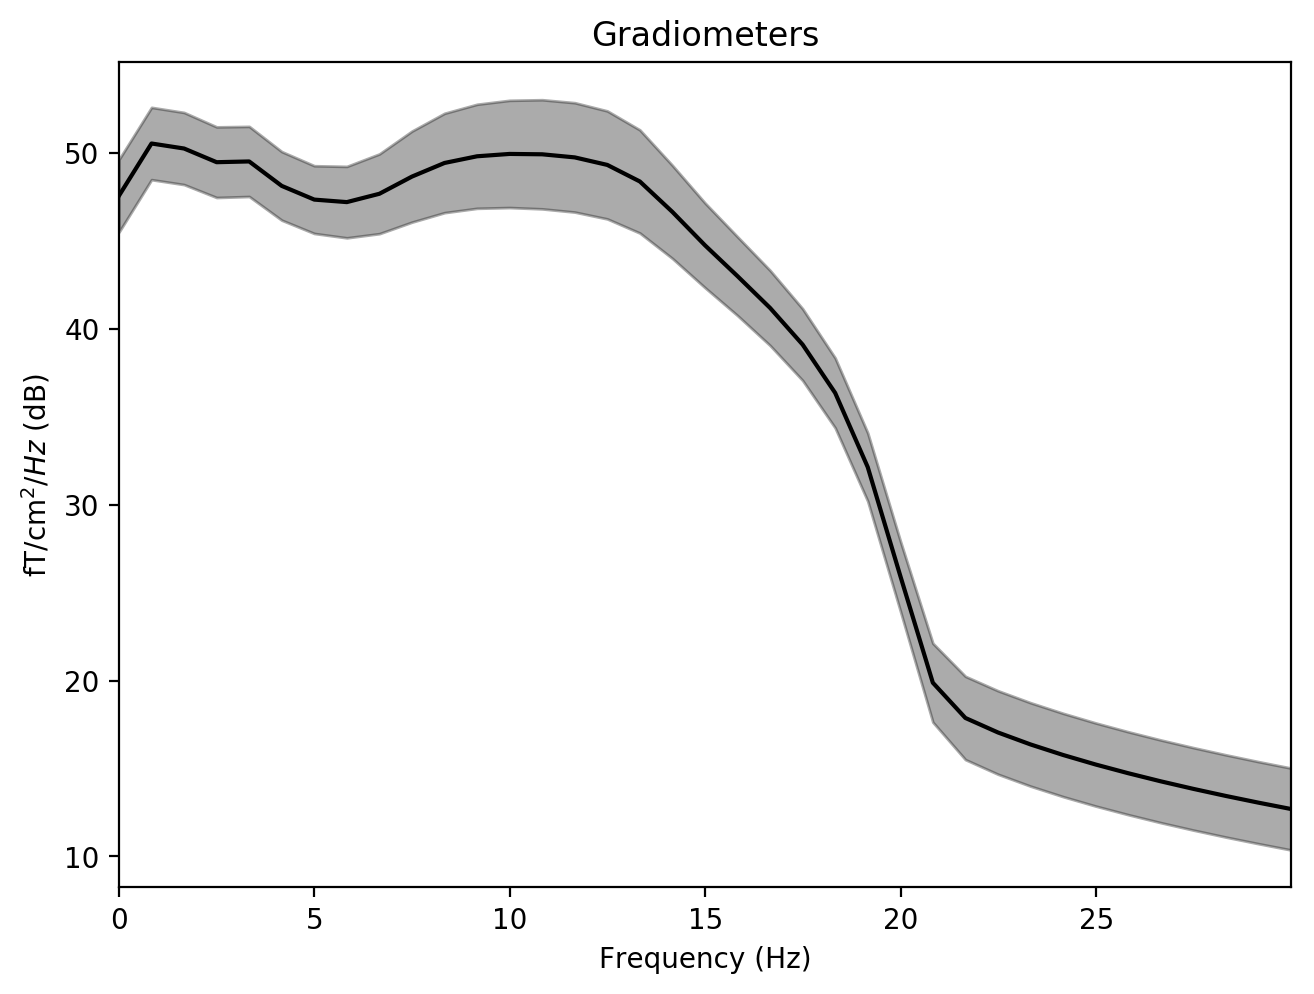

In [19]:
epochs.plot_psd(fmin=0, fmax=30)

In [102]:
csd_1 = mne.time_frequency.csd_morlet(epochs, [10], tmin=0.5, tmax=0.8, n_cycles=2)
csd_right_1 = mne.time_frequency.csd_morlet(epochs['deviant_right'], [10], tmin=0.5, tmax=0.8, n_cycles=2)
csd_left_1 = mne.time_frequency.csd_morlet(epochs['deviant_left'], [10], tmin=0.5, tmax=0.8, n_cycles=2)
csd_standard_1 = mne.time_frequency.csd_morlet(epochs['standard'], [10], tmin=0.5, tmax=0.8, n_cycles=2)

Computing cross-spectral density from epochs...
    Computing CSD matrix for epoch 1
    Computing CSD matrix for epoch 2
    Computing CSD matrix for epoch 3
    Computing CSD matrix for epoch 4
    Computing CSD matrix for epoch 5
    Computing CSD matrix for epoch 6
    Computing CSD matrix for epoch 7
    Computing CSD matrix for epoch 8
    Computing CSD matrix for epoch 9
    Computing CSD matrix for epoch 10
    Computing CSD matrix for epoch 11
    Computing CSD matrix for epoch 12
    Computing CSD matrix for epoch 13
    Computing CSD matrix for epoch 14
    Computing CSD matrix for epoch 15
    Computing CSD matrix for epoch 16
    Computing CSD matrix for epoch 17
    Computing CSD matrix for epoch 18
    Computing CSD matrix for epoch 19
    Computing CSD matrix for epoch 20
    Computing CSD matrix for epoch 21
    Computing CSD matrix for epoch 22
    Computing CSD matrix for epoch 23
    Computing CSD matrix for epoch 24
    Computing CSD matrix for epoch 25
    Computi

    Computing CSD matrix for epoch 6
    Computing CSD matrix for epoch 7
    Computing CSD matrix for epoch 8
[done]
Computing cross-spectral density from epochs...
    Computing CSD matrix for epoch 1
    Computing CSD matrix for epoch 2
    Computing CSD matrix for epoch 3
    Computing CSD matrix for epoch 4
    Computing CSD matrix for epoch 5
    Computing CSD matrix for epoch 6
    Computing CSD matrix for epoch 7
    Computing CSD matrix for epoch 8
    Computing CSD matrix for epoch 9
    Computing CSD matrix for epoch 10
    Computing CSD matrix for epoch 11
    Computing CSD matrix for epoch 12
    Computing CSD matrix for epoch 13
    Computing CSD matrix for epoch 14
    Computing CSD matrix for epoch 15
    Computing CSD matrix for epoch 16
    Computing CSD matrix for epoch 17
    Computing CSD matrix for epoch 18
    Computing CSD matrix for epoch 19
    Computing CSD matrix for epoch 20
    Computing CSD matrix for epoch 21
    Computing CSD matrix for epoch 22
    Com

In [103]:
print(csd_1)

<CrossSpectralDensity  |  n_channels=204, time=0.341 to 0.958 s, frequencies=10 Hz.>


In [104]:
plt = csd_1.plot(mode='coh')[0]
plt_left = csd_left_1.plot(mode='coh')[0]
plt_right = csd_right_1.plot(mode='coh')[0]
plt_standard = csd_standard_1.plot(mode='coh')[0]

In [105]:
copiedmodel = mne.setup_source_space('IZ1',
                                   subjects_dir=('/Users/samutienhaara/Downloads/fs'), add_dist=False)

Setting up the source space with the following parameters:

SUBJECTS_DIR = /Users/samutienhaara/Downloads/fs
Subject      = IZ1
Surface      = white
Octahedron subdivision grade 6

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /Users/samutienhaara/Downloads/fs/IZ1/surf/lh.white...
Mapping lh IZ1 -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/samutienhaara/Downloads/fs/IZ1/surf/lh.sphere...
    Triangle neighbors and vertex normals...
Nearest-neighbor searches will be significantly faster if scikit-learn is installed.
Setting up the triangulation for the decimated surface...
loaded lh.white 4098/162893 selected to source space (oct = 6)

Loading /Users/samutienhaara/Downloads/fs/IZ1/surf/rh.white...
Mapping rh IZ1 -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/samutienhaara/Downloads/fs/IZ1/surf/rh.sphere...
    Triangle neighbors and vertex normals...
Nearest-neighb

In [106]:
import os.path as op

subjects_dir=('/Users/samutienhaara/Downloads/fs')
fname = op.join(subjects_dir, 'bem','sample-oct-6-src.fif')
mne.write_source_spaces(fname, copiedmodel, overwrite=True)

Overwriting existing file.
    Write a source space...
    [done]
    Write a source space...
    [done]
    2 source spaces written


In [107]:
import conpy
trans = '/Users/samutienhaara/Downloads/fs/Ivan-trans.fif' # File containing the MRI<->Head transformation
bem = ('/Users/samutienhaara/Downloads/fs/3-layer-bem-sol.fif')
fwd_1 = mne.make_forward_solution(evoked[0].info, trans=trans, src=copiedmodel, bem=bem, meg=True, eeg=False)
fwd_tan = conpy.forward_to_tangential(fwd_1)

Source space          : <SourceSpaces: [<surface (lh), n_vertices=162893, n_used=4098, coordinate_frame=MRI (surface RAS)>, <surface (rh), n_vertices=167345, n_used=4098, coordinate_frame=MRI (surface RAS)>]>
MRI -> head transform : /Users/samutienhaara/Downloads/fs/Ivan-trans.fif
Measurement data      : instance of Info
Conductor model   : /Users/samutienhaara/Downloads/fs/3-layer-bem-sol.fif
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 8196 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.994441 -0.037346 -0.098448      -0.11 mm
     0.073348  0.916512  0.393226      35.93 mm
     0.075543 -0.398261  0.914156      30.82 mm
     0.000000  0.000000  0.000000       1.00

Read 204 MEG channels from info
81 coil definitions read
Coordinate transformation: MEG device -> head
     0.999923 -0.012358  0.001090      -1.46 mm
     0.012333  0.999721  0.020166      -4.04 mm
    -0.00

In [108]:
import os.path as op

subjects_dir=('/Users/samutienhaara/Downloads/fs')
fwd_1['src'].plot(trans='/Users/samutienhaara/Downloads/fs/Ivan-trans.fif')

In [109]:
fwd = mne.read_forward_solution('simulated-data-fwd.fif')

Reading forward solution from simulated-data-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (498 sources, 306 channels, free orientations)
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (498 sources, 60 channels, free orientations)
    MEG and EEG forward solutions combined
    Source spaces transformed to the forward solution coordinate frame


In [110]:
csd_1.ch_names

['MEG0112',
 'MEG0113',
 'MEG0122',
 'MEG0123',
 'MEG0132',
 'MEG0133',
 'MEG0142',
 'MEG0143',
 'MEG0212',
 'MEG0213',
 'MEG0222',
 'MEG0223',
 'MEG0232',
 'MEG0233',
 'MEG0242',
 'MEG0243',
 'MEG0312',
 'MEG0313',
 'MEG0322',
 'MEG0323',
 'MEG0332',
 'MEG0333',
 'MEG0342',
 'MEG0343',
 'MEG0412',
 'MEG0413',
 'MEG0422',
 'MEG0423',
 'MEG0432',
 'MEG0433',
 'MEG0442',
 'MEG0443',
 'MEG0512',
 'MEG0513',
 'MEG0522',
 'MEG0523',
 'MEG0532',
 'MEG0533',
 'MEG0542',
 'MEG0543',
 'MEG0612',
 'MEG0613',
 'MEG0622',
 'MEG0623',
 'MEG0632',
 'MEG0633',
 'MEG0642',
 'MEG0643',
 'MEG0712',
 'MEG0713',
 'MEG0722',
 'MEG0723',
 'MEG0732',
 'MEG0733',
 'MEG0742',
 'MEG0743',
 'MEG0812',
 'MEG0813',
 'MEG0822',
 'MEG0823',
 'MEG0912',
 'MEG0913',
 'MEG0922',
 'MEG0923',
 'MEG0932',
 'MEG0933',
 'MEG0942',
 'MEG0943',
 'MEG1012',
 'MEG1013',
 'MEG1022',
 'MEG1023',
 'MEG1032',
 'MEG1033',
 'MEG1042',
 'MEG1043',
 'MEG1112',
 'MEG1113',
 'MEG1122',
 'MEG1123',
 'MEG1132',
 'MEG1133',
 'MEG1142',
 'ME

In [111]:
from mne.time_frequency import read_csd
from mne.beamformer import make_dics, apply_dics_csd

info = mne.io.read_info('/Users/samutienhaara/Downloads/simulated-data-epo.fif')
# Compute DICS beamformer filters
filters_1 = make_dics(info=epochs.info, forward=fwd_1, csd=csd_1)

Isotrak not found
    204 out of 204 channels remain after picking
Computing DICS spatial filters...


In [112]:
print('Filters have been computed for %d points on the cortex at %d frequency.' %
      (filters_1['weights'].shape[1], filters_1['weights'].shape[0]))
print('At each point, there are %d source dipoles (XYZ)' % filters_1['n_orient'])

Filters have been computed for 24588 points on the cortex at 1 frequency.
At each point, there are 3 source dipoles (XYZ)


In [128]:
power_map_1, frequencies_1 = mne.beamformer.apply_dics_csd(csd_1, filters_1)

Computing DICS source power...
[done]


In [129]:
power_map_1.plot(hemi='both', smoothing_steps=20, time_label = None)

In [130]:
print(power_map_1)

<SourceEstimate  |  8196 vertices, subject : IZ1, tmin : 0.0 (ms), tmax : 0.0 (ms), tstep : 1000.0 (ms), data shape : (8196, 1)>


In [131]:
import numpy as np
seed_point_1 = np.argmax(power_map_1.data)
print(seed_point_1)

478


In [132]:
brain = power_map_1.plot(hemi='both', smoothing_steps=20)  # Plotting the power map

lh_verts, rh_verts = power_map_1.vertices
if seed_point_1 < len(lh_verts):
    brain.add_foci(lh_verts[seed_point_1], coords_as_verts=True, hemi='lh')
else:
    brain.add_foci(rh_verts[seed_point_1 - len(lh_verts)], coords_as_verts=True, hemi='rh')

In [133]:
#the forward model with tangential dipoles, instead of spheres, is used to reduce search space.
pairs_1 = conpy.one_to_all_connectivity_pairs(fwd_tan, seed_point_1, min_dist=0)
con_right_1 = conpy.dics_connectivity(pairs_1, fwd_tan, csd_right_1)
con_left_1 = conpy.dics_connectivity(pairs_1, fwd_tan, csd_left_1)
con_standard_1 = conpy.dics_connectivity(pairs_1, fwd_tan, csd_standard_1)

    204 out of 204 channels remain after picking
Computing coherence between 8196 source pairs in 1 blocks...
[done]
    204 out of 204 channels remain after picking
Computing coherence between 8196 source pairs in 1 blocks...
[done]
    204 out of 204 channels remain after picking
Computing coherence between 8196 source pairs in 1 blocks...
[done]


In [134]:
print (con_right_1)

<VertexConnectivity  |  n_sources=8196, n_conns=8196, subject=IZ1>


In [135]:
coherence_right_1 = con_right_1.make_stc('sum', weight_by_degree = True)
coherence_left_1 = con_left_1.make_stc('sum', weight_by_degree = True)
coherence_standard_1 = con_standard_1.make_stc('sum', weight_by_degree = True)

In [136]:
brain_1 = coherence_right_1.plot(hemi='both', smoothing_steps=20)

lh_verts, rh_verts = coherence_right_1.vertices
if seed_point_1 < len(lh_verts):
    # Seed point is on the left hemisphere
    brain_1.add_foci(lh_verts[seed_point_1], coords_as_verts=True, hemi='lh')
else:
    # Seed point is on the right hemisphere
    brain_1.add_foci(rh_verts[seed_point_1 - len(lh_verts)], coords_as_verts=True, hemi='rh')

In [137]:
coherence_contrast_right_1 = (con_right_1 - con_standard_1).make_stc('sum', weight_by_degree = True)
coherence_contrast_left_1 = (con_left_1 - con_standard_1).make_stc('sum', weight_by_degree = True)

In [138]:
# Plotting the coherence map: deviant right vs standard
brain_2 = coherence_contrast_right_1.plot(hemi='both', smoothing_steps=20, time_label = None)
mlab.view(0, 0, 550, [0, 0, 0])
mlab.title('One-to-all coherence: deviant right vs standard', height=0.9)

lh_verts, rh_verts = coherence_contrast_right_1.vertices
if seed_point_1 < len(lh_verts):
    # Seed point is on the left hemisphere
    brain_1.add_foci(lh_verts[seed_point_1], coords_as_verts=True, hemi='lh')
else:
    # Seed point is on the right hemisphere
    brain_1.add_foci(rh_verts[seed_point_1 - len(lh_verts)], coords_as_verts=True, hemi='rh')


In [139]:
# Plotting the coherence map: deviant left vs standard
brain_2 = coherence_contrast_left_1.plot(hemi='both', smoothing_steps=20, time_label = None)
mlab.view(0, 0, 550, [0, 0, 0])
mlab.title('One-to-all coherence: deviant left vs standard', height=0.9)

lh_verts, rh_verts = coherence_contrast_left_1.vertices
if seed_point_1 < len(lh_verts):
    # Seed point is on the left hemisphere
    brain_1.add_foci(lh_verts[seed_point_1], coords_as_verts=True, hemi='lh')
else:
    # Seed point is on the right hemisphere
    brain_1.add_foci(rh_verts[seed_point_1 - len(lh_verts)], coords_as_verts=True, hemi='rh')


In [143]:
allpairs_1 = conpy.all_to_all_connectivity_pairs(fwd_tan, min_dist=0.13)
all_to_all_left_1 = conpy.dics_connectivity(allpairs_1, fwd_tan, csd_left_1)
all_to_all_right_1 = conpy.dics_connectivity(allpairs_1, fwd_tan, csd_right_1)
all_to_all_standard_1 = conpy.dics_connectivity(allpairs_1, fwd_tan, csd_standard_1)
all_to_all_contrast_left_1 = (all_to_all_left_1 - all_to_all_standard_1)
all_to_all_contrast_right_1 = (all_to_all_right_1 - all_to_all_standard_1)

    204 out of 204 channels remain after picking
Computing coherence between 1002040 source pairs in 101 blocks...
[done]
    204 out of 204 channels remain after picking
Computing coherence between 1002040 source pairs in 101 blocks...
[done]
    204 out of 204 channels remain after picking
Computing coherence between 1002040 source pairs in 101 blocks...
[done]


In [144]:
print(all_to_all_contrast_right_1)

<VertexConnectivity  |  n_sources=8196, n_conns=1002040, subject=IZ1>


In [145]:
print(all_to_all_contrast_left_1)

<VertexConnectivity  |  n_sources=8196, n_conns=1002040, subject=IZ1>


In [162]:
all_to_all_coherence_right_1 = all_to_all_contrast_right_1.make_stc()
brain_right = all_to_all_coherence_right_1.plot(hemi='both', smoothing_steps=20, time_label = None, views = 'lat');


# add a title.

mlab.title('All-to-all coherence (right vs standard)', height=0.9)

In [163]:
all_to_all_coherence_left_1 = all_to_all_contrast_left_1.make_stc()
brain_left = all_to_all_coherence_left_1.plot(hemi='both', smoothing_steps=20, time_label = None, views = 'lat');


# add a title.

mlab.title('All-to-all coherence (left vs standard)', height=0.9)

In [164]:
brain_left.add_annotation('aparc')
brain_right.add_annotation('aparc')

In [165]:
labels = mne.read_labels_from_annot(subject = 'IZ1')

Reading labels from parcellation...
   read 34 labels from /Users/samutienhaara/Downloads/fs/IZ1/label/lh.aparc.annot
   read 34 labels from /Users/samutienhaara/Downloads/fs/IZ1/label/rh.aparc.annot


In [173]:
p = all_to_all_contrast_right_1.parcellate(labels, 'absmax', weight_by_degree=True)

Computing out- and in-degree for each label...
Summarizing connectivity...
    in bankssts-lh
    in bankssts-rh
    in caudalanteriorcingulate-lh
    in caudalanteriorcingulate-rh
    in caudalmiddlefrontal-lh
    in caudalmiddlefrontal-rh
    in cuneus-lh
    in cuneus-rh
    in entorhinal-lh
    in entorhinal-rh
    in frontalpole-lh
    in frontalpole-rh
    in fusiform-lh
    in fusiform-rh
    in inferiorparietal-lh
    in inferiorparietal-rh
    in inferiortemporal-lh
    in inferiortemporal-rh
    in insula-lh
    in insula-rh
    in isthmuscingulate-lh
    in isthmuscingulate-rh
    in lateraloccipital-lh
    in lateraloccipital-rh
    in lateralorbitofrontal-lh
    in lateralorbitofrontal-rh
    in lingual-lh
    in lingual-rh
    in medialorbitofrontal-lh
    in medialorbitofrontal-rh
    in middletemporal-lh
    in middletemporal-rh
    in paracentral-lh
    in paracentral-rh
    in parahippocampal-lh
    in parahippocampal-rh
    in parsopercularis-lh
    in parsoperculari

In [174]:
pleft = all_to_all_contrast_left_1.parcellate(labels, 'absmax', weight_by_degree=True)

Computing out- and in-degree for each label...
Summarizing connectivity...
    in bankssts-lh
    in bankssts-rh
    in caudalanteriorcingulate-lh
    in caudalanteriorcingulate-rh
    in caudalmiddlefrontal-lh
    in caudalmiddlefrontal-rh
    in cuneus-lh
    in cuneus-rh
    in entorhinal-lh
    in entorhinal-rh
    in frontalpole-lh
    in frontalpole-rh
    in fusiform-lh
    in fusiform-rh
    in inferiorparietal-lh
    in inferiorparietal-rh
    in inferiortemporal-lh
    in inferiortemporal-rh
    in insula-lh
    in insula-rh
    in isthmuscingulate-lh
    in isthmuscingulate-rh
    in lateraloccipital-lh
    in lateraloccipital-rh
    in lateralorbitofrontal-lh
    in lateralorbitofrontal-rh
    in lingual-lh
    in lingual-rh
    in medialorbitofrontal-lh
    in medialorbitofrontal-rh
    in middletemporal-lh
    in middletemporal-rh
    in paracentral-lh
    in paracentral-rh
    in parahippocampal-lh
    in parahippocampal-rh
    in parsopercularis-lh
    in parsoperculari

In [179]:
from matplotlib import pyplot as plt
p.plot(n_lines=10, vmin=0, vmax=1)
plt.title('Deviant right condition: 10 Strongest parcel-to-parcel connections', color='white')

Text(0.5,1.05,'Deviant right condition: 10 Strongest parcel-to-parcel connections')

In [177]:
from matplotlib import pyplot as plt
pleft.plot(n_lines=10, vmin=0, vmax=1)
plt.title('Deviant left condition: 10 Strongest parcel-to-parcel connections', color='white')

Text(0.5,1.05,'Deviant left condition: 10 Strongest parcel-to-parcel connections')